In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import csv, re
import sys
plt.rcParams['figure.figsize'] = (8.0, 6.0)

def find_index(dummy_file, string):
    index_string = [string in x for x in dummy_file].index(True)
    return index_string

class PatientStudy(object):

    def __init__(self):
        self.f = open("renal_anomaly.csv", "r")
        self.csv_data = csv.DictReader(self.f)
        self.np_data = np.array(self.data_to_list())
        self.header = [re.sub("[#\[/\]]", '', x.lower()) for x in self.csv_data.fieldnames]

    def index(self, string):
        i = find_index(self.header, string)
        return i

    def data_to_list(self):
        data_list = []
        for row in self.csv_data:
            row_list = []
            for field in self.csv_data.fieldnames:
                row_list.append(row[field])
            data_list.append(row_list)
        return data_list

In [2]:
patient_data = PatientStudy()

In [3]:
patient_data.header

['id',
 'race',
 'status',
 'notes',
 'non-pelvic us',
 'pelvic us',
 'non-pelvic mri',
 'pelvic mri',
 'non-pelvic ct',
 'pelvic ct',
 'xr',
 'fluoro (vcug)',
 'other']

In [4]:
raw_data = {}
for i in range(len(patient_data.header)):
    raw_data[patient_data.header[i]] = patient_data.np_data[:, i]

In [5]:
df = pd.DataFrame(raw_data, columns = patient_data.header)

In [6]:
df.columns

Index([u'id', u'race', u'status', u'notes', u'non-pelvic us', u'pelvic us',
       u'non-pelvic mri', u'pelvic mri', u'non-pelvic ct', u'pelvic ct', u'xr',
       u'fluoro (vcug)', u'other'],
      dtype='object')

In [7]:
df

,id,race,status,notes,non-pelvic us,pelvic us,non-pelvic mri,pelvic mri,non-pelvic ct,pelvic ct,xr,fluoro (vcug),other
0,1,"White,Non-Hispanic",Undecided,Horseshoe kidney only. No data since 2013,1,0,1,0,1,0,1,1,0
1,2,"White,Non-Hispanic",Excluded,Bilateral vesicoureteral reflux with recurrent...,1,1,1,0,1,0,0,1,0
2,3,"White,Non-Hispanic",Excluded,Renal agenesis only. No data since 2005,1,0,0,0,0,0,1,1,0
3,4,"Black,Non-Hispanic",Excluded,Renal agenesis. VATER. No data since 2013,1,0,1,0,1,0,1,1,0
4,5,"Unknown,Unknown",Excluded,Renal agenesis. No data since 2003,1,0,0,0,0,0,0,1,0
5,6,"White,Hispanic/Latino",Excluded,Right pelvic kidney. No data since 2013,1,0,1,0,1,0,1,1,1
6,7,"White,Non-Hispanic",Included,OHVIRA. 12 yo. Drainged hematocolpos/pyocolpos,999,999,999,999,999,999,999,999,999
7,8,"White,Non-Hispanic",Undecided,Doubled ureter. Diagnosis states doubling of u...,1,0,0,1,1,0,0,0,0
8,9,"White,Non-Hispanic",Excluded,Renovascular HTN. No data since 1994,999,999,999,999,999,999,999,999,999
9,10,"White,Non-Hispanic",Excluded,Renal agenesis- diabetic mother. No data since...,1,0,0,0,0,0,1,0,0


In [8]:
non_pelvic_only = pd.DataFrame(np.zeros((2, 3)), index=["Excluded", "Included"], columns=["US", "MRI", "CT"])
pelvic_only = pd.DataFrame(np.zeros((2, 3)), index=["Excluded", "Included"], columns=["US", "MRI", "CT"])
both = pd.DataFrame(np.zeros((2, 3)), index=["Excluded", "Included"], columns=["US", "MRI", "CT"])
none = pd.DataFrame(np.zeros((2, 3)), index=["Excluded", "Included"], columns=["US", "MRI", "CT"])

In [9]:
def update_data_frame(df, output, status, non_pelvic='0', pelvic='0'):
    tests = ['US', 'MRI', 'CT']
    for test in tests:
        filtered_data = df[(df['status'] == status) & (df['non-pelvic ' + test.lower()] == non_pelvic) & 
                           (df['pelvic ' + test.lower()] == pelvic)]
        output.loc[status, test] = len(filtered_data)

In [10]:
# Non-Pelvic Only Exams
update_data_frame(df, non_pelvic_only, 'Excluded', non_pelvic='1', pelvic='0')
update_data_frame(df, non_pelvic_only, 'Included', non_pelvic='1', pelvic='0')

# Pelvic Only Exams
update_data_frame(df, pelvic_only, 'Excluded', non_pelvic='0', pelvic='1')
update_data_frame(df, pelvic_only, 'Included', non_pelvic='0', pelvic='1')

# Both Exams
update_data_frame(df, both, 'Excluded', non_pelvic='1', pelvic='1')
update_data_frame(df, both, 'Included', non_pelvic='1', pelvic='1')

# No Exams
update_data_frame(df, none, 'Excluded', non_pelvic='0', pelvic='0')
update_data_frame(df, none, 'Included', non_pelvic='0', pelvic='0')

In [11]:
non_pelvic_only

,US,MRI,CT
Excluded,68.0,30.0,27.0
Included,8.0,3.0,3.0


In [12]:
pelvic_only

,US,MRI,CT
Excluded,1.0,4.0,4.0
Included,8.0,7.0,3.0


In [13]:
both

,US,MRI,CT
Excluded,12.0,6.0,11.0
Included,10.0,12.0,9.0


In [14]:
none

,US,MRI,CT
Excluded,13.0,54.0,52.0
Included,3.0,7.0,14.0


In [15]:
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

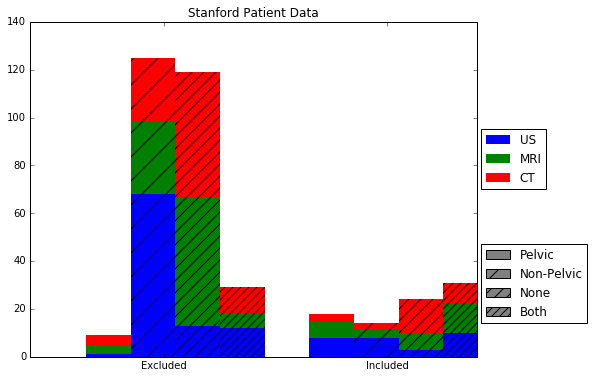

In [16]:
# # create fake dataframes
# df1 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"],
#                    columns=["I", "J", "K", "L", "M"])
# df2 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"],
#                    columns=["I", "J", "K", "L", "M"])
# df3 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"], 
#                    columns=["I", "J", "K", "L", "M"])
# Then, just call :
plot_clustered_stacked([pelvic_only, non_pelvic_only, none, both],["Pelvic", "Non-Pelvic", "None", "Both"], 
                      title='Stanford Patient Data')

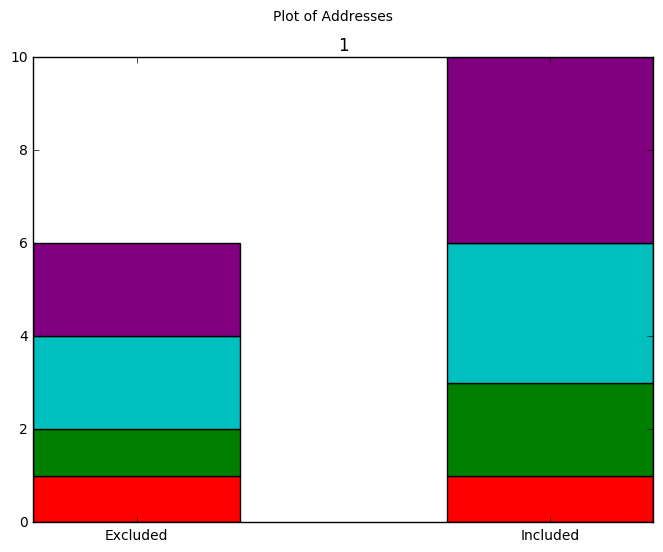

In [30]:
c_1 = np.array([[1, 1],
                [1, 2],
                [2, 3],
                [2, 4]])
c_1_colors = ['r', 'g', 'c', 'purple']
c_1_labels = ['PAL Code', 'Bash', 'App', 'Kernel']
ind = np.arange(2)    
width = 0.5     
f, ax = plt.subplots(1, 1)

plt.xticks(ind+width/2., ('Excluded', 'Included'))
plt.suptitle('Plot of Addresses')
p = [] # list of bar properties

def create_subplot(matrix, colors, axis, title):
    bar_renderers = []
    ind = np.arange(matrix.shape[1])
    bottoms = np.cumsum(np.vstack((np.zeros(matrix.shape[1]), matrix)), axis=0)[:-1]
    for i, row in enumerate(matrix):
        r = axis.bar(ind, row, width=0.5, color=colors[i], bottom=bottoms[i])
        bar_renderers.append(r)
    axis.set_title(title)
    return bar_renderers
    
p.extend(create_subplot(c_1,c_1_colors, ax, '1'))

**Groups**  
Excluded (Renal Problems): Non-Pelvic, Pelvic : US, MRI, CT  
Included (Uterus & Kidney Problems): Non-Pelvic, Pelvic: US, MRI, CT


**Patient types**
Diagnosed with kidney problems - Has Pelvic workup or Does not have pelvic workup
Within pelvic workup - pelvic mri, 
kidney problems (Renal) - excluded (only renal problems) group

Uterus Problems - 

Uterus and Kidney problems - included group


In [4]:
direct_df = pd.read_csv("renal_anomaly.csv")

In [5]:
direct_df.columns = [i.lower() for i in direct_df.columns]

In [67]:
renal_us_np = df[(df['status'] == 'Excluded') & (df['non-pelvic us'] == '1') & (df['pelvic us'] == '0')]
non_pelvic_only.loc['Excluded', 'US'] = len(renal_us_np)
renal_mri_np = df[(df['status'] == 'Excluded') & (df['non-pelvic mri'] == '1') & (df['pelvic mri'] == '0')]
non_pelvic_only.loc['Excluded', 'MRI'] = len(renal_mri_np)
renal_ct_np = df[(df['status'] == 'Excluded') & (df['non-pelvic ct'] == '1') & (df['pelvic ct'] == '0')]
non_pelvic_only.loc['Excluded', 'CT'] = len(renal_ct_np)

In [60]:
filtered_data = df[(df['status'] == 'Excluded') & (df['non-pelvic mri'] == '0') & (df['pelvic mri'] == '1')]

In [2]:
f = open("renal_anomaly.csv", "r")

In [3]:
data = csv.DictReader(f)

In [13]:
data.fieldnames

['Id',
 'Race',
 'Status',
 'Notes',
 'Non-pelvic US',
 'pelvic US',
 'Non-pelvic MRI',
 'Pelvic MRI',
 'Non-pelvic CT',
 'Pelvic CT',
 'XR',
 'Fluoro (VCUG)',
 'Other']

In [5]:
data_list = []
for row in data: 
    row_list = []
    for field in data.fieldnames:
        row_list.append(row[field])
    data_list.append(row_list)

In [6]:
def get_index(data, "")
    data.fieldnames.index("Status")

2

In [10]:
np_data_list = np.array(data_list)

In [32]:
np_data_list

NameError: name 'np_data_list' is not defined

In [55]:
status = []
for row in data:
    status.append([row['Status'], row['Non-pelvic US']])

In [56]:
numpy_status = np.array(status)

In [57]:
numpy_status[:,1]

IndexError: too many indices for array